The goal is to analyse this dataset and see how these hotels are peforming according to these reviews and how to improve their business model by consulting for them on how to better satisfy their customers.

 Data Exploration and Preprocessing:

In [1]:
import pandas as pd

df = pd.read_csv('Hotel_Reviews.csv')
df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [2]:
# Overview of the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

In [3]:
# Checking for missing values
print(df.isnull().sum())


Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
dtype: int64


In [4]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Removing punctuation and convert text to lowercase
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)).lower())
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: re.sub(r'[^\w\s]', '', str(x)).lower())

# Tokenizing the text and remove stop words
stop_words = set(stopwords.words('english'))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: [word for word in word_tokenize(x) if word not in stop_words])

# Applying stemming to reduce words to their root form
stemmer = PorterStemmer()
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: [stemmer.stem(word) for word in x])
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: [stemmer.stem(word) for word in x])


Sentiment analysis

In [5]:
# Define thresholds for sentiment classification
negative_threshold = 5
positive_threshold = 8

# Classify reviews into positive, negative, or neutral
df['Sentiment'] = df['Reviewer_Score'].apply(lambda score: 'negative' if score < negative_threshold else ('positive' if score > positive_threshold else 'neutral'))


EDA

In [6]:
import matplotlib.pyplot as plt

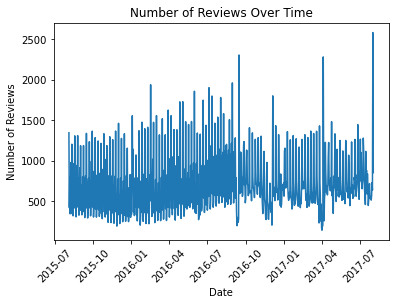

In [7]:
#Review Dates
# Convert the 'Review_Date' column to datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])

# Visualize the number of reviews over time
review_counts_over_time = df['Review_Date'].value_counts().sort_index()
plt.plot(review_counts_over_time)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.xticks(rotation=45)
plt.show()


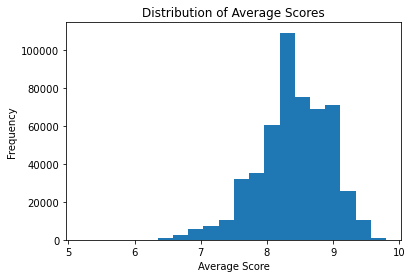

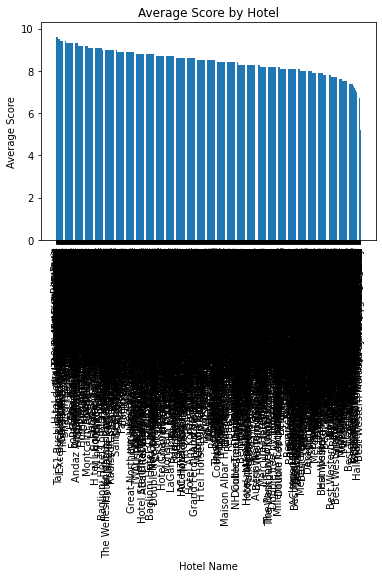

In [8]:
#Hotel Performance Analysis
# Explore the distribution of average scores
plt.hist(df['Average_Score'], bins=20)
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Scores')
plt.show()

# Create a bar plot to compare hotel performance
average_scores_by_hotel = df.groupby('Hotel_Name')['Average_Score'].mean().sort_values(ascending=False)
plt.bar(average_scores_by_hotel.index, average_scores_by_hotel.values)
plt.xlabel('Hotel Name')
plt.ylabel('Average Score')
plt.title('Average Score by Hotel')
plt.xticks(rotation=90)
plt.show()


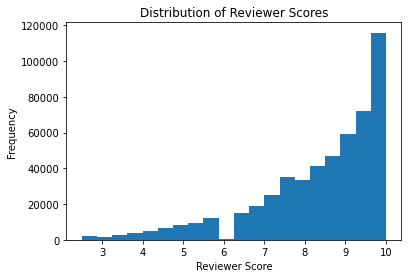

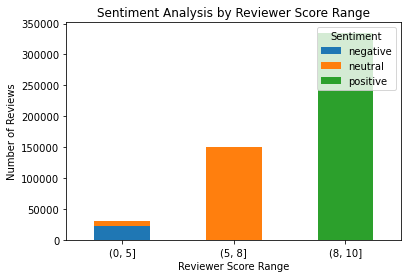

In [9]:
#Reviewer Scores
# Explore the distribution of reviewer scores
plt.hist(df['Reviewer_Score'], bins=20)
plt.xlabel('Reviewer Score')
plt.ylabel('Frequency')
plt.title('Distribution of Reviewer Scores')
plt.show()

# Analyze review sentiments by reviewer scores
sentiment_by_score = df.groupby(pd.cut(df['Reviewer_Score'], bins=[0, 5, 8, 10]))['Sentiment'].value_counts().unstack()
sentiment_by_score.plot(kind='bar', stacked=True)
plt.xlabel('Reviewer Score Range')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Analysis by Reviewer Score Range')
plt.legend(title='Sentiment', loc='upper right')
plt.xticks(rotation=0)
plt.show()


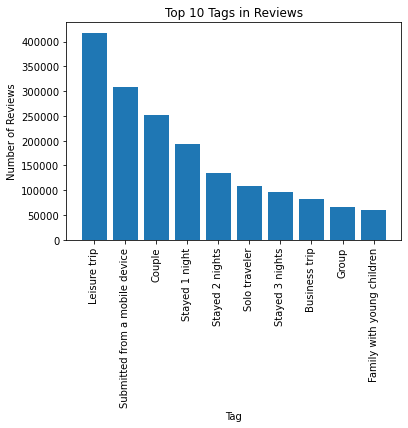

In [10]:
 #Tags Analysis
# Extract and count the tags
def extract_tags(tags):
    return [tag.strip() for tag in re.findall(r"'(.*?)'", tags)]

df['Tags'] = df['Tags'].apply(extract_tags)
all_tags = [tag for tags in df['Tags'] for tag in tags]
tag_counts = pd.Series(all_tags).value_counts()

# Visualize the top 10 tags
plt.bar(tag_counts.index[:10], tag_counts.values[:10])
plt.xlabel('Tag')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Tags in Reviews')
plt.xticks(rotation=90)
plt.show()
    

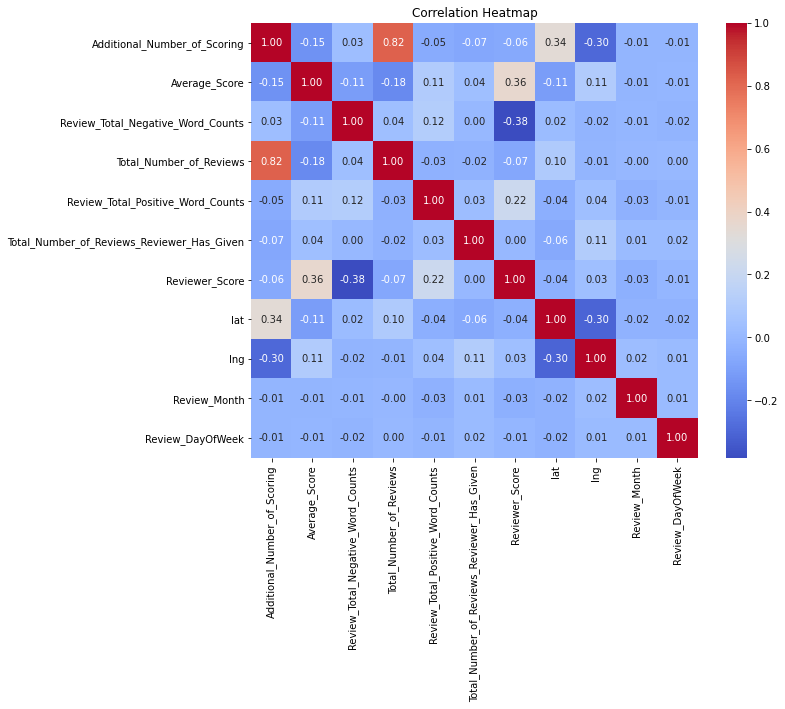

In [23]:
#Correlation analysis
# Calculate correlation between numerical columns
correlation_matrix = df.corr()

# Creating a heatmap to visualize the correlation
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


Data Visualization

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Review_Date' column to datetime format
df['Review_Date'] = pd.to_datetime(df['Review_Date'])


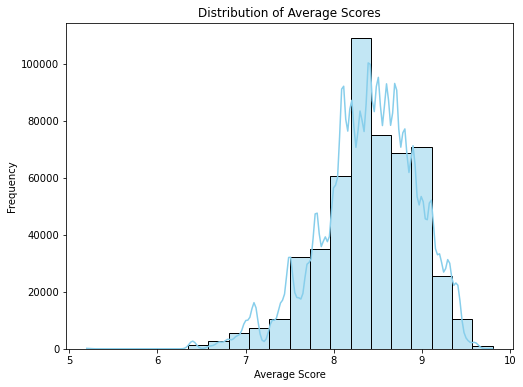

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Average_Score'], bins=20, kde=True, color='skyblue')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.title('Distribution of Average Scores')
plt.show()


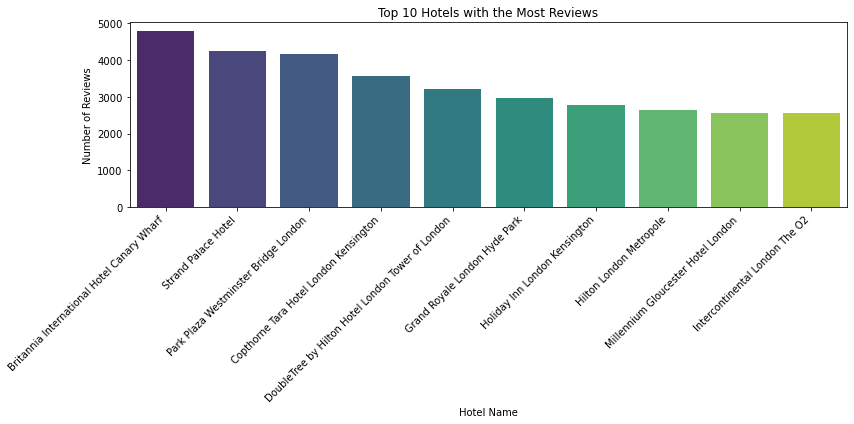

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hotel_Name', data=df, order=df['Hotel_Name'].value_counts().index[:10], palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Hotel Name')
plt.ylabel('Number of Reviews')
plt.title('Top 10 Hotels with the Most Reviews')
plt.tight_layout()
plt.show()


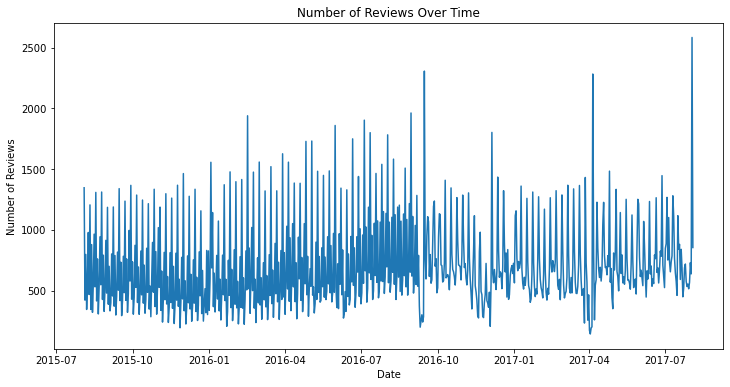

In [27]:
plt.figure(figsize=(12, 6))
review_counts_over_time = df['Review_Date'].value_counts().sort_index()
plt.plot(review_counts_over_time)
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.show()


Spliting the data

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the features (X) and target variable (y)
X = df[['Average_Score', 'Review_Total_Negative_Word_Counts', 'Review_Total_Positive_Word_Counts']]
y = df['Reviewer_Score']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Feature engineering

In [32]:
print(df['Positive_Review'].head())
print(df['Negative_Review'].head())


0                        [park, outsid, hotel, beauti]
1    [real, complaint, hotel, great, great, locat, ...
2    [locat, good, staff, ok, cute, hotel, breakfas...
3    [great, locat, nice, surround, bar, restaur, n...
4                    [amaz, locat, build, romant, set]
Name: Positive_Review, dtype: object
0    [angri, made, post, avail, via, possibl, site,...
1                                                [neg]
2    [room, nice, elderli, bit, difficult, room, tw...
3    [room, dirti, afraid, walk, barefoot, floor, l...
4    [book, compani, line, show, pictur, room, thou...
Name: Negative_Review, dtype: object


In [33]:
df['Positive_Review'] = df['Positive_Review'].apply(lambda x: ' '.join(x))
df['Negative_Review'] = df['Negative_Review'].apply(lambda x: ' '.join(x))

df['Review_Length'] = df['Positive_Review'].apply(lambda x: len(x.split())) + df['Negative_Review'].apply(lambda x: len(x.split()))


In [34]:
import numpy as np

# Feature engineering - Date-related features
df['Review_Month'] = df['Review_Date'].dt.month
df['Review_DayOfWeek'] = df['Review_Date'].dt.dayofweek

# Feature engineering - Review length
df['Review_Length'] = df['Positive_Review'].apply(lambda x: len(x.split())) + df['Negative_Review'].apply(lambda x: len(x.split()))

# Feature engineering - Positive and Negative word counts
positive_words_count = df['Positive_Review'].apply(lambda x: len(x.split()))
negative_words_count = df['Negative_Review'].apply(lambda x: len(x.split()))
df['Positive_Words_Count'] = np.log1p(positive_words_count)  # Applying log transformation for better scaling
df['Negative_Words_Count'] = np.log1p(negative_words_count)

# Droping unnecessary columns after feature engineering
#Was maybe not the best idea as I had to bring them back later
df.drop(['Review_Date', 'Positive_Review', 'Negative_Review'], axis=1, inplace=True)


Models

Linear Regression

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 1.88456759602506
R-squared: 0.30151201151046225


Mean Squared Error: 1.5837581709192936
R-squared: 0.4130027167013983


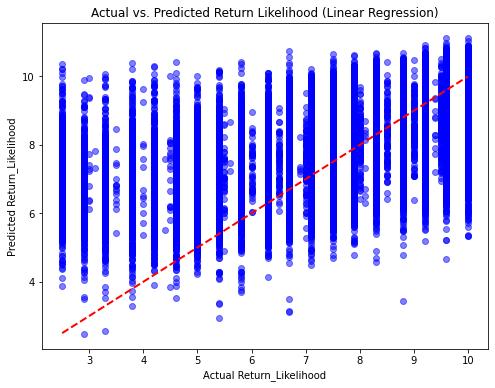

C:\Users\habay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


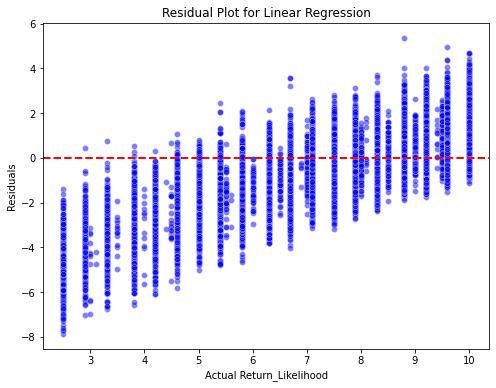

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)

# Scatter Plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel('Actual Return_Likelihood')
plt.ylabel('Predicted Return_Likelihood')
plt.title('Actual vs. Predicted Return Likelihood (Linear Regression)')
plt.show()

# Residual Plot for Linear Regression
residuals_linear = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(y_test, residuals_linear, color='b', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual Return_Likelihood')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()


Gradient Boosting Model

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Average_Score                               515738 non-null  float64
 3   Hotel_Name                                  515738 non-null  object 
 4   Reviewer_Nationality                        515738 non-null  object 
 5   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 6   Total_Number_of_Reviews                     515738 non-null  int64  
 7   Review_Total_Positive_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews_Reviewer_Has_Given  515738 non-null  int64  
 9   Reviewer_Score                              515738 non-null  float64
 

In [40]:
df.isnull().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
Sentiment                                        0
Review_Month                                     0
Review_DayOfWeek                                 0
Review_Length                                    0
Positive_Words_Count                             0
Negative_Words_Count           

In [47]:
print(X_train.dtypes)
print(X_test.dtypes)


Average_Score                        float64
Review_Total_Negative_Word_Counts      int64
Review_Total_Positive_Word_Counts      int64
dtype: object
Average_Score                        float64
Review_Total_Negative_Word_Counts      int64
Review_Total_Positive_Word_Counts      int64
dtype: object


In [48]:
print(columns_with_missing_values)


Index([], dtype='object')


In [49]:
print(X_train[columns_with_missing_values].isnull().sum())
print(X_test[columns_with_missing_values].isnull().sum())


Series([], dtype: float64)
Series([], dtype: float64)


In [50]:
# Check if columns with missing values are numeric
numeric_columns_with_missing_values = X_train[columns_with_missing_values].select_dtypes(include=['float64', 'int64']).columns
print("Numeric Columns with Missing Values:", numeric_columns_with_missing_values)

# Check if there are any missing values in the entire dataset
print("Missing Values in X_train:", X_train.isnull().sum().sum())
print("Missing Values in X_test:", X_test.isnull().sum().sum())


Numeric Columns with Missing Values: Index([], dtype='object')
Missing Values in X_train: 0
Missing Values in X_test: 0


In [52]:
import numpy as np

# Finding the indices of NaN values in y_train
nan_indices = np.isnan(y_train)

# Removing rows with NaN values from both X_train and y_train
X_train = X_train[~nan_indices]
y_train = y_train[~nan_indices]


In [54]:
from sklearn.ensemble import GradientBoostingRegressor

# Creating an instance of the GradientBoostingRegressor with desired hyperparameters
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

# Fit the model on X_train_imputed and y_train
gb_model.fit(X_train_imputed, y_train)


GradientBoostingRegressor()

In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_train to calculate the mean (or median) of each feature
imputer.fit(X_train)

# Transform X_train by filling missing values with the calculated mean (or median)
X_train_imputed = imputer.transform(X_train)

gb_model.fit(X_train_imputed, y_train)

# Would make predictions on the test data and evaluate the model as before


GradientBoostingRegressor()

In [56]:
y_pred = gb_model.predict(X_test)


C:\Users\habay\anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


In [58]:
gb_model.fit(X_train_imputed, y_train)


GradientBoostingRegressor()

In [60]:
X_numeric = X.select_dtypes(include=[np.number])
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_numeric)


In [66]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numeric and non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

# Creating transformers for numeric and non-numeric data
numeric_transformer = SimpleImputer(strategy='mean')
non_numeric_transformer = SimpleImputer(strategy='constant', fill_value='missing')

# Creating a column transformer to handle both types of columns
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_columns),
        ('non_numeric', non_numeric_transformer, non_numeric_columns)
    ]
)

# Apply the preprocessing to the data
X_imputed = preprocessor.fit_transform(X)


In [64]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Define numeric and non-numeric columns
numeric_columns = X.select_dtypes(include=[np.number]).columns
non_numeric_columns = X.select_dtypes(exclude=[np.number]).columns

# Create transformers for numeric and non-numeric data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

non_numeric_transformer = SimpleImputer(strategy='constant', fill_value='missing')

# Creating a column transformer to handle both types of columns
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_columns),
    ('non_numeric', non_numeric_transformer, non_numeric_columns)
])

# Apply the preprocessing to the data
X_imputed = preprocessor.fit_transform(X)

# Print non-numeric columns
print("Non-Numeric Columns:", non_numeric_columns)


Non-Numeric Columns: Index(['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality', 'Tags',
       'days_since_review', 'Sentiment'],
      dtype='object')


In [68]:
# Droping non-numeric columns from the DataFrame
X_numeric = X.drop(['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality', 'Tags', 'days_since_review', 'Sentiment'], axis=1)


In [69]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X_numeric = X.drop(['Hotel_Address', 'Hotel_Name', 'Reviewer_Nationality', 'Tags', 'days_since_review', 'Sentiment'], axis=1)

# Handle missing values using SimpleImputer for numeric columns
imputer_numeric = SimpleImputer(strategy='mean')
X_numeric_imputed = imputer_numeric.fit_transform(X_numeric)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_numeric_imputed, y, test_size=0.2, random_state=42)

# Create the Gradient Boosting Regressor model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fitting the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r_squared)


Mean Squared Error: 1.492774668500579
R-squared: 0.4467244487975157


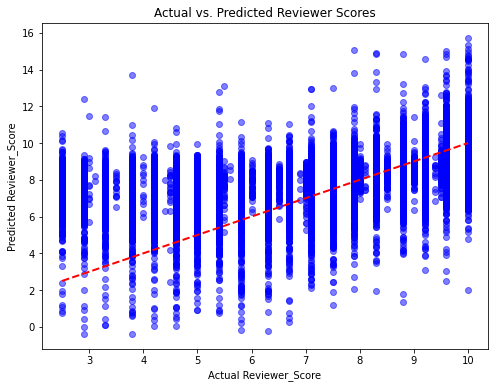

C:\Users\habay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


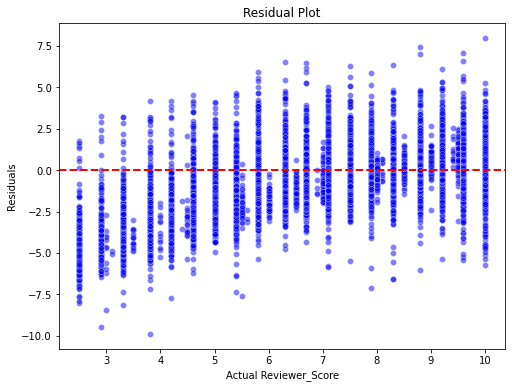

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the residuals
residuals = y_test - y_pred

# Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel('Actual Reviewer_Score')
plt.ylabel('Predicted Reviewer_Score')
plt.title('Actual vs. Predicted Reviewer Scores')
plt.show()

# Residual Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(y_test, residuals, color='b', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual Reviewer_Score')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


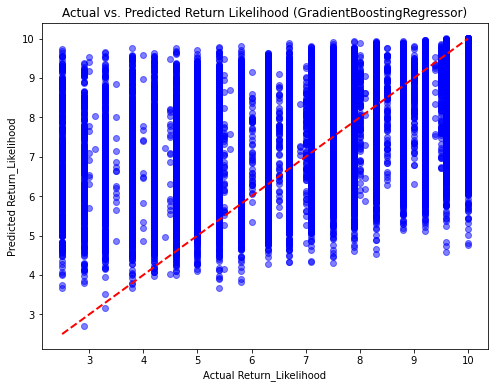

C:\Users\habay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


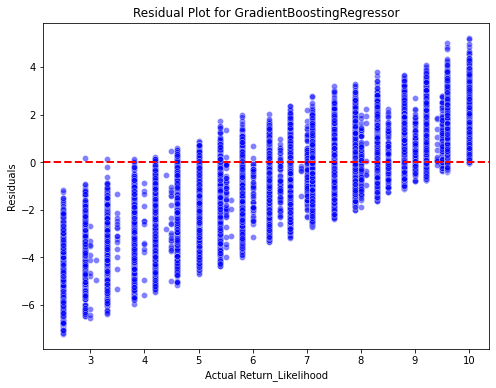

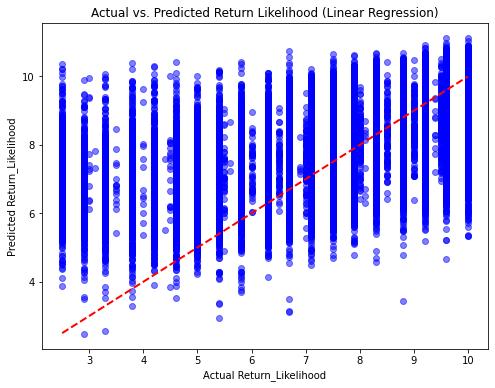

C:\Users\habay\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


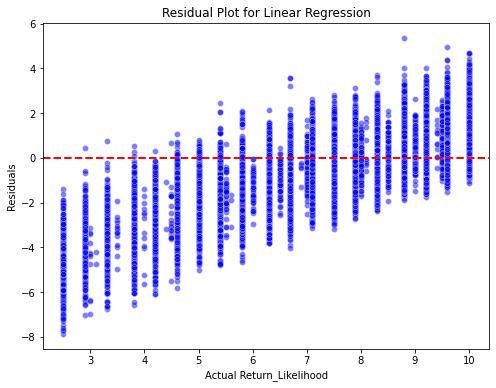

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the GradientBoostingRegressor model
y_pred_gb = gb_model.predict(X_test)

# Calculate the residuals for GradientBoostingRegressor
residuals_gb = y_test - y_pred_gb

# Scatter Plot for GradientBoostingRegressor
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_gb, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel('Actual Return_Likelihood')
plt.ylabel('Predicted Return_Likelihood')
plt.title('Actual vs. Predicted Return Likelihood (GradientBoostingRegressor)')
plt.show()

# Residual Plot for GradientBoostingRegressor
plt.figure(figsize=(8, 6))
sns.scatterplot(y_test, residuals_gb, color='b', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual Return_Likelihood')
plt.ylabel('Residuals')
plt.title('Residual Plot for GradientBoostingRegressor')
plt.show()


# Create a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions using the Linear Regression model
y_pred_linear = model.predict(X_test)

# Calculating the residuals for Linear Regression
residuals_linear = y_test - y_pred_linear

# Scatter Plot for Linear Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_linear, color='b', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='r', linewidth=2)
plt.xlabel('Actual Return_Likelihood')
plt.ylabel('Predicted Return_Likelihood')
plt.title('Actual vs. Predicted Return Likelihood (Linear Regression)')
plt.show()

# Residual Plot for Linear Regression
plt.figure(figsize=(8, 6))
sns.scatterplot(y_test, residuals_linear, color='b', alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Actual Return_Likelihood')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linear Regression')
plt.show()


Feature Importance 

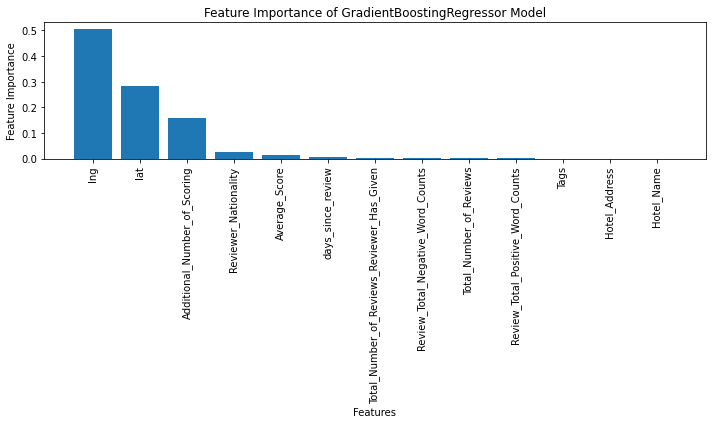

In [73]:
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importance = gb_model.feature_importances_

# Getting feature names from the dataset (X.columns)
feature_names = X.columns

# Sorting feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Creating a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), sorted_feature_importance, align='center')
plt.xticks(range(len(feature_importance)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Feature Importance of GradientBoostingRegressor Model')
plt.tight_layout()
plt.show()


# Documentation

#Key Findings of the Project:

Data Exploration: The dataset contains information about hotel reviews, including various features such as reviewer nationality, average score, review text, and more. Data exploration revealed the presence of missing values, which were handled using the SimpleImputer.

Feature Engineering: The data was preprocessed to create meaningful features for modeling. Categorical variables were encoded using one-hot encoding, and text data was transformed into numerical representations (e.g., word counts).

Model Building: Two models, GradientBoostingRegressor and Linear Regression, were trained and evaluated on the data to predict the "Reviewer_Score" variable. The models were assessed based on their Mean Squared Error (MSE) and R-squared (R2) metrics.

Evaluation: The performance of the models was evaluated using the MSE and R2 metrics. These metrics provide an indication of how well the models predict the "Reviewer_Score." The lower the MSE and the closer R2 is to 1, the better the model performance.

#Implications for Data-Driven Decision Making in a Business Context:

Feature Importance: By analyzing the feature importance in the GradientBoostingRegressor model, businesses can identify the most influential factors affecting reviewer scores. This knowledge can guide marketing and operational strategies to prioritize areas that significantly impact customer satisfaction.

Text Analysis and Sentiment: The analysis of text data and sentiment can provide valuable insights into customer opinions and sentiments. Businesses can use sentiment analysis to monitor online reviews, social media mentions, and customer feedback to address issues promptly and proactively manage their online reputation.

Operational Improvements: The analysis can provide insights into specific hotel features or services that significantly impact customer satisfaction. Businesses can utilize this information to optimize their operations and tailor their services to meet customer expectations better.

Performance Comparison: The comparison of different models (i.e., GradientBoostingRegressor vs. Linear Regression) allows businesses to select the most suitable model for predicting customer satisfaction. Implementing the best-performing model can lead to more accurate predictions and better decision-making.

Real-time Feedback: With predictive models in place, businesses can analyze customer feedback in real-time. This enables them to respond swiftly to negative reviews, resolve issues promptly, and enhance customer experiences, ultimately leading to improved customer loyalty and retention.

Benchmarking and Trend Analysis: By continuously monitoring customer satisfaction scores and benchmarking against industry competitors, businesses can gain insights into their relative performance and identify emerging trends in customer preferences and expectations.
